# Лаврій Софія, Лабораторна робот 5

In [1]:
import pathlib
import numpy as np

# turn our training path into a Python path
data_dir = pathlib.Path("D:/KNUniversity/4 year/neural networks/food_classes/train/")

# created a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['beignets' 'falafel' 'nachos']


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "D:/KNUniversity/4 year/neural networks/food_classes/test/"
test_dir = "D:/KNUniversity/4 year/neural networks/food_classes/train/"

In [3]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


# 1. CNN model

## 1.1 Adam optimizer

In [4]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
  ])

# Compile the model
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=2,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/2
24/24 [==============================] - 45s 2s/step - loss: 0.9223 - accuracy: 0.5680 - val_loss: 0.9137 - val_accuracy: 0.5511
Epoch 2/2
24/24 [==============================] - 38s 2s/step - loss: 0.7428 - accuracy: 0.6800 - val_loss: 0.9228 - val_accuracy: 0.5956


In [5]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [6]:
model_1.evaluate(valid_data)

8/8 [==============================] - 4s 445ms/step - loss: 0.9228 - accuracy: 0.5956


[0.9227525591850281, 0.5955555438995361]

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

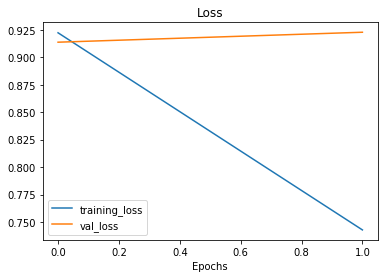

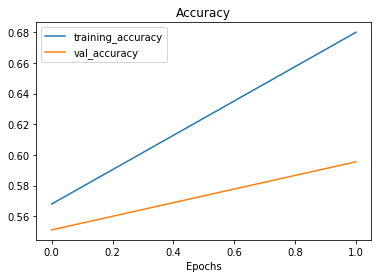

In [8]:
plot_loss_curves(history_1)

## 1.2 SGD optimizer

In [10]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
  ])

# Compile the model
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_1.fit(train_data,
                        epochs=2,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/2
24/24 [==============================] - 53s 2s/step - loss: 1.0940 - accuracy: 0.3547 - val_loss: 1.0869 - val_accuracy: 0.5200
Epoch 2/2
24/24 [==============================] - 49s 2s/step - loss: 1.0695 - accuracy: 0.4813 - val_loss: 1.0444 - val_accuracy: 0.4978


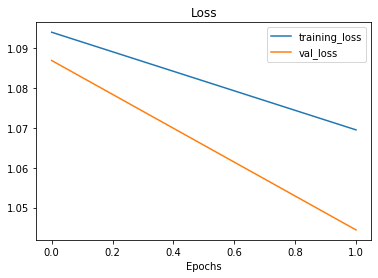

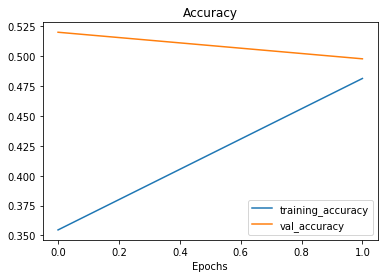

In [11]:
plot_loss_curves(history_2)

# 2. ResNet101 model

## 2.1 Adam optimizer

In [12]:
model_2=tf.keras.applications.ResNet101(include_top=False)
model_2.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=model_2(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)

model_resnet=tf.keras.Model(inputs,outputs)

In [13]:
model_resnet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [14]:
history_resnet_adam =  model_resnet.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data, 
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 239s 10s/step - loss: 1.0780 - accuracy: 0.4187 - val_loss: 1.0742 - val_accuracy: 0.4133
Epoch 2/2
24/24 [==============================] - 318s 13s/step - loss: 1.0553 - accuracy: 0.4307 - val_loss: 1.0603 - val_accuracy: 0.4311


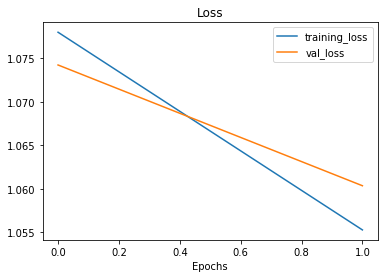

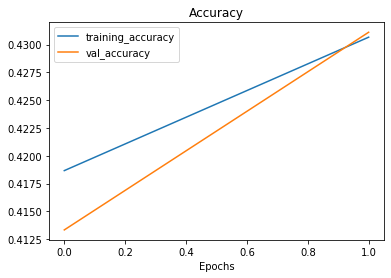

In [15]:
plot_loss_curves(history_resnet_adam)

In [16]:
model_resnet.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet101 (Functional)       (None, None, None, 2048)  42658176  
_________________________________________________________________
gap_layer (GlobalAveragePool (None, 2048)              0         
_________________________________________________________________
output_layer (Dense)         (None, 3)                 6147      
Total params: 42,664,323
Trainable params: 6,147
Non-trainable params: 42,658,176
_________________________________________________________________


## fine-tune resnet model

In [17]:
for layer in model_2.layers[-10:]:
    layer.trainable=True

In [18]:
model_resnet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [19]:
history_resnet_adam_1 =  model_resnet.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data, 
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 254s 11s/step - loss: 1.0744 - accuracy: 0.4187 - val_loss: 1.0882 - val_accuracy: 0.4044
Epoch 2/2
24/24 [==============================] - 239s 10s/step - loss: 0.9986 - accuracy: 0.5080 - val_loss: 1.0596 - val_accuracy: 0.4311


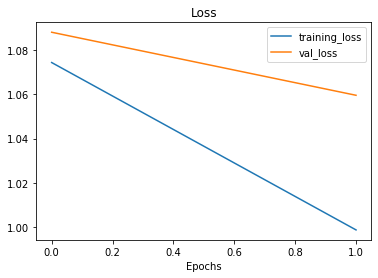

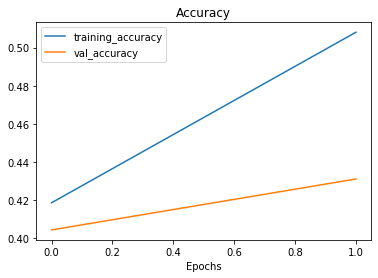

In [20]:
plot_loss_curves(history_resnet_adam_1)

## 2.2 SGD

In [22]:
model_2.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x=model_2(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)
model_resnet=tf.keras.Model(inputs,outputs)

model_resnet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)

history_resnet_sgd =  model_resnet.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 242s 10s/step - loss: 1.4093 - accuracy: 0.3480 - val_loss: 1.1635 - val_accuracy: 0.3378
Epoch 2/2
24/24 [==============================] - 238s 10s/step - loss: 1.4115 - accuracy: 0.3400 - val_loss: 1.0955 - val_accuracy: 0.3644


Результати гірші, ніж з Адамом

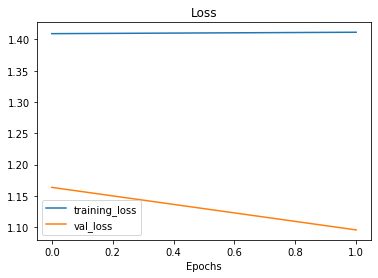

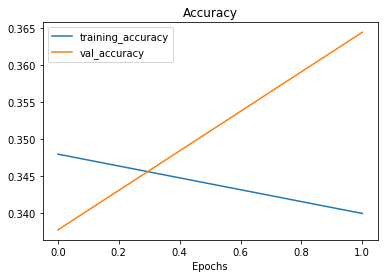

In [24]:
plot_loss_curves(history_resnet_sgd)

# 3. Efficient model

## 3.1 Adam

In [25]:
model_3=tf.keras.applications.EfficientNetB0(include_top=False)
model_3.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=model_3(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)

model_efficient=tf.keras.Model(inputs,outputs)

In [26]:
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [27]:
# model_3.trainable=False
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)
history_efficient_adam =  model_efficient.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 82s 3s/step - loss: 1.1092 - accuracy: 0.3307 - val_loss: 1.1085 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 72s 3s/step - loss: 1.1062 - accuracy: 0.3280 - val_loss: 1.1001 - val_accuracy: 0.3333


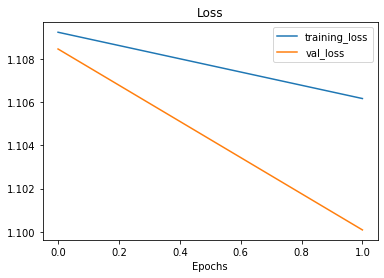

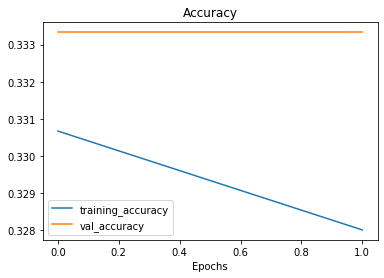

In [28]:
plot_loss_curves(history_efficient_adam)

????????

In [29]:
for layer in model_3.layers[-10:]:
    layer.trainable=True

In [35]:
def model_trainable_layers(model):
    for layer_number, layer in enumerate(model.layers):
        print(layer_number, layer.name, layer.trainable, len(layer.trainable_variables))

In [36]:
model_trainable_layers(model_3)

0 input_2 False 0
1 rescaling False 0
2 normalization False 0
3 stem_conv_pad False 0
4 stem_conv False 0
5 stem_bn False 0
6 stem_activation False 0
7 block1a_dwconv False 0
8 block1a_bn False 0
9 block1a_activation False 0
10 block1a_se_squeeze False 0
11 block1a_se_reshape False 0
12 block1a_se_reduce False 0
13 block1a_se_expand False 0
14 block1a_se_excite False 0
15 block1a_project_conv False 0
16 block1a_project_bn False 0
17 block2a_expand_conv False 0
18 block2a_expand_bn False 0
19 block2a_expand_activation False 0
20 block2a_dwconv_pad False 0
21 block2a_dwconv False 0
22 block2a_bn False 0
23 block2a_activation False 0
24 block2a_se_squeeze False 0
25 block2a_se_reshape False 0
26 block2a_se_reduce False 0
27 block2a_se_expand False 0
28 block2a_se_excite False 0
29 block2a_project_conv False 0
30 block2a_project_bn False 0
31 block2b_expand_conv False 0
32 block2b_expand_bn False 0
33 block2b_expand_activation False 0
34 block2b_dwconv False 0
35 block2b_bn False 0
36 bloc

In [30]:
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [31]:
history_efficient_adam_1 =  model_efficient.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 70s 3s/step - loss: 1.1379 - accuracy: 0.3160 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 92s 4s/step - loss: 1.1064 - accuracy: 0.3467 - val_loss: 1.0984 - val_accuracy: 0.3289


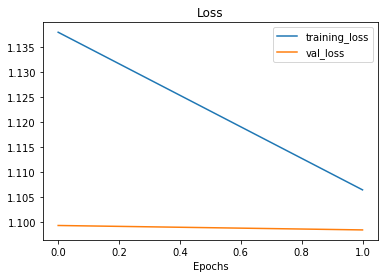

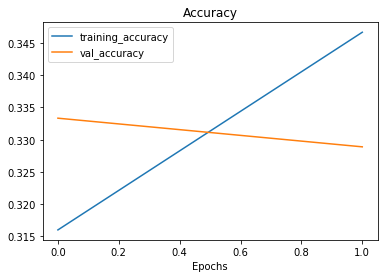

In [32]:
plot_loss_curves(history_efficient_adam_1)

Дає результати трохи гірші, ніж untrainable

# SGD

In [38]:
model_3.trainable=False
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)
history_efficient_sgd =  model_efficient.fit(train_data, 
                                        epochs=2, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/2
24/24 [==============================] - 81s 3s/step - loss: 1.1008 - accuracy: 0.3347 - val_loss: 1.0983 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 66s 3s/step - loss: 1.0996 - accuracy: 0.3440 - val_loss: 1.0984 - val_accuracy: 0.3333


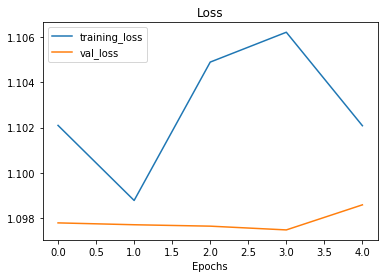

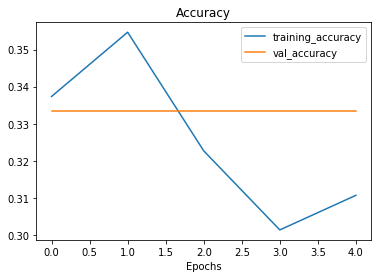

In [64]:
plot_loss_curves(history_efficient_sgd)

## Usage of EfficientNetB4 instead of EfficientNetB0

In [40]:
model_4=tf.keras.applications.EfficientNetB4(include_top=False)
model_4.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=model_4(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)

model_efficient=tf.keras.Model(inputs,outputs)

71696384/71686520 [==============================] - 11s 0us/step


In [41]:
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [43]:
history_efficient_sgd =  model_efficient.fit(train_data, 
                                        epochs=2, 
                                        validation_data=valid_data)

Epoch 1/2
24/24 [==============================] - 200s 8s/step - loss: 1.1222 - accuracy: 0.3013 - val_loss: 1.1158 - val_accuracy: 0.3333
Epoch 2/2
24/24 [==============================] - 192s 8s/step - loss: 1.1099 - accuracy: 0.3493 - val_loss: 1.1096 - val_accuracy: 0.3333


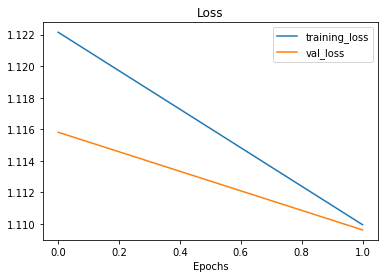

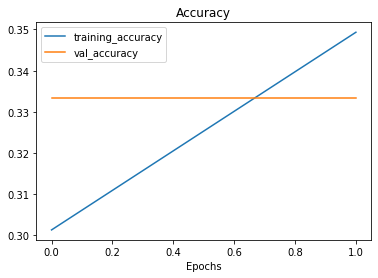

In [46]:
plot_loss_curves(history_efficient_sgd)

# Conclusions

Отже, ми порівняли декілька нейронних моделей на однаковому наборі даних. Результати показали, що найкраще з задачею мультикласової класифікації справилась CNN модель з оптимізатором Адам (SGD давав гірші результати для всіх моделей). Щось дивне відбувалось з моделями РесНет та Ефішенсі, тому що, коли в першій частині лабораторної роботи ми формувалм модель з посилання, то результати вони показувати гарні (>=80%), але конфьюжн матриця не відображала таких гарних результатів. До того ж, коли ми завантажуємо ці ж моделі і проводимо ті самі дії отримуємо вже точність нижчу (<40%). Окрім того, в якийсь момент точність на валідаційній вибірці стала 0.33 і перестала змінюватись (це не тільки для 2 епох: пробувала тренувати більше епох - все одно залишось 0.33 незмінним). 
Результати лаборатоної показали, що при проведенні файн-тюнінгу, то точність лише погіршувались або лишались незмінними. 